<a href="https://www.kaggle.com/code/muradab/car-price-prediction?scriptVersionId=153166550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Car prediction using Linear Regression

Importing Libraries and data sets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
# #         print(os.path.join(dirname, filename))

data_path = "/kaggle/input/vehicle-dataset-from-cardekho/car data.csv"

# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv(data_path)
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# ***data encoding***

In [2]:
# Encoding seller type
car_dataset.replace({'Seller_Type': {'Dealer': 1, 'Individual': 0}}, inplace=True)


# Data and target variables
X = car_dataset[['Present_Price', 'Seller_Type']]
Y = car_dataset['Selling_Price']

# Converting data to numpy arrays
X = np.array(X)
Y = np.array(Y)

adding sea born for visualization purposes

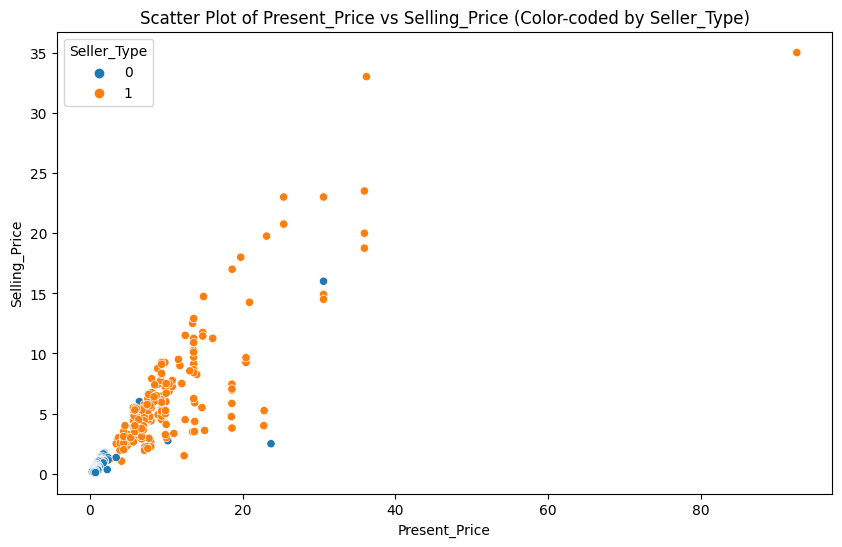

In [3]:
import seaborn as sns



# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Seller_Type', data=car_dataset)
plt.title("Scatter Plot of Present_Price vs Selling_Price (Color-coded by Seller_Type)")
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.show()


# splitting data into training and test data

In [4]:
def split_data(X, Y, test_size=0.1, random_state=None):
    if random_state:
        np.random.seed(random_state)

    X, Y = np.atleast_2d(X), np.atleast_1d(Y)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_point = int((1 - test_size) * X.shape[0])

    train_indices, test_indices = indices[:split_point], indices[split_point:]

    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = split_data(X, Y, test_size=0.1, random_state=2)


# model training

In [5]:
def train_linear_regression(X_train, Y_train):
    # Add a bias term to the input features
    X_train_bias = np.c_[np.ones((len(X_train), 1)), X_train]

    # Calculate the weights using the normal equation
    # weights = (X^T * X)^(-1) * X^T * Y
    XTX_inv = np.linalg.inv(np.matmul(X_train_bias.T, X_train_bias))
    weights = np.matmul(np.matmul(XTX_inv, X_train_bias.T), Y_train)

    return weights

def predict_linear_regression(X, weights):
    # Add a bias term to the input features
    X_bias = np.c_[np.ones((len(X), 1)), X]

    # Make predictions using the learned weights
    predictions = np.matmul(X_bias, weights)

    return predictions
weights = train_linear_regression(X_train, Y_train)

# ***Model evaluation***

In [6]:
# Model Evaluation on Training data
training_predictions = predict_linear_regression(X_train, weights)
error_score = 1 - np.sum((Y_train - training_predictions)**2) / np.sum((Y_train - np.mean(Y_train))**2)
print("R squared Error (Training): ", error_score)

R squared Error (Training):  0.7879880564897965


# ***Visualization***

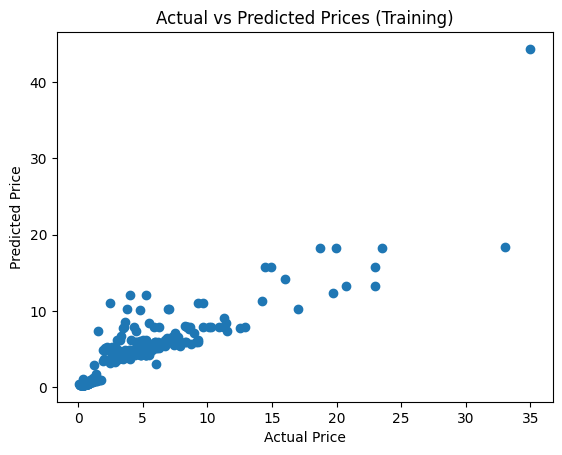

R squared Error (Test):  0.7644994350645271


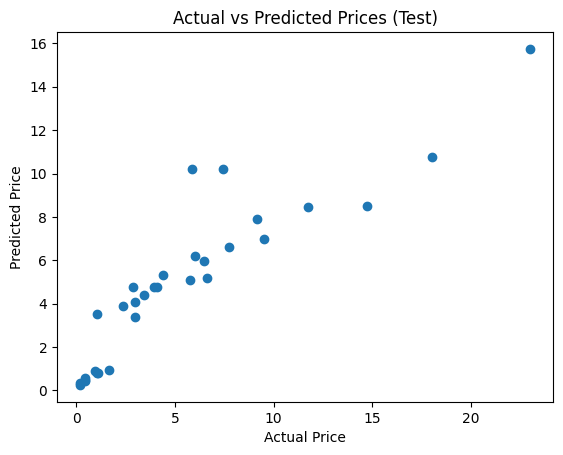

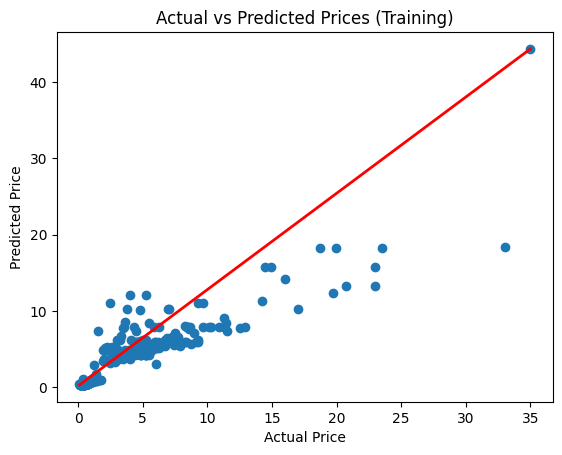

In [7]:
# Visualize the actual vs predicted prices on Training data
plt.scatter(Y_train, training_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Training)")
plt.show()

# Model Evaluation on Test data
test_predictions = predict_linear_regression(X_test, weights)
error_score = 1 - np.sum((Y_test - test_predictions)**2) / np.sum((Y_test - np.mean(Y_test))**2)
print("R squared Error (Test): ", error_score)

# Visualize the actual vs predicted prices on Test data
plt.scatter(Y_test, test_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Test)")
plt.show()

# Visualize the actual vs predicted prices on Training data
plt.scatter(Y_train, training_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Training)")

# Plotting the regression line
plt.plot([min(Y_train), max(Y_train)], [min(training_predictions), max(training_predictions)], color='red', linewidth=2)

plt.show()